<a href="https://colab.research.google.com/github/Betsy194/Deep-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras import datasets, layers, models

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

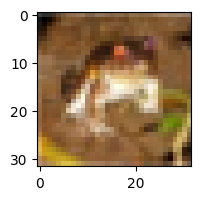

In [4]:
plt.figure(figsize = (15, 2))
plt.imshow(X_train[0])

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

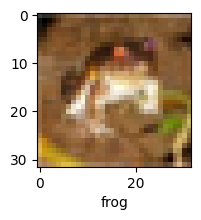

In [15]:
plot_sample(X_train, y_train, 0)

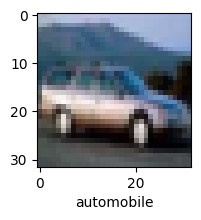

In [16]:
plot_sample(X_train, y_train, 4)

In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
#Simple Artificial Neural Network
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.3038 - loss: 1.9297
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.4176 - loss: 1.6447
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 186s 105ms/step - accuracy: 0.4517 - loss: 1.5513
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 163s 81ms/step - accuracy: 0.4767 - loss: 1.4880
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 82ms/step - accuracy: 0.4912 - loss: 1.4433


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report (y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.42      0.51      1000
           1       0.67      0.54      0.60      1000
           2       0.28      0.59      0.38      1000
           3       0.36      0.20      0.26      1000
           4       0.68      0.11      0.20      1000
           5       0.33      0.51      0.40      1000
           6       0.61      0.36      0.45      1000
           7       0.52      0.56      0.54      1000
           8       0.50      0.74      0.60      1000
           9       0.55      0.58      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.52      0.46      0.45     10000
weighted avg       0.52      0.46      0.45     10000



In [25]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#softmax explanation for sample probabilities

1 = 0.45
2 = 0.67

In [20]:
softmax = (0.45)/ (0.45 + 0.67)
softmax

0.40178571428571425

In [21]:
softmax = (0.67)/ (0.45 + 0.67)
softmax

0.5982142857142857

In [22]:
c = 0.40178571428571425 + 0.5982142857142857
c

1.0

In [26]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.3850 - loss: 1.7019
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.5967 - loss: 1.1455
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.6603 - loss: 0.9773
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.6951 - loss: 0.8825
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.7199 - loss: 0.8123
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7400 - loss: 0.7456
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7560 - loss: 0.7043
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 43ms/step - accuracy: 0.7713 - loss: 0.6573
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7817 - loss: 0.6224
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.7970 - loss: 0.5855


In [28]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6948 - loss: 0.9285


[0.9411011934280396, 0.6873000264167786]

In [29]:
np.argmax([5, 2,10,1])
#the result is the index of the max no

2

In [30]:
y_pred = cnn.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


array([[4.87798767e-04, 4.05514147e-05, 2.90167681e-03, ...,
        4.00356366e-04, 9.50346421e-03, 2.50967772e-04],
       [2.65458301e-02, 1.78074941e-01, 1.20109530e-06, ...,
        6.99961555e-09, 7.95247912e-01, 1.24193975e-04],
       [5.43448329e-02, 8.41562569e-01, 7.32091503e-05, ...,
        8.24045332e-04, 6.47318512e-02, 3.52172069e-02],
       ...,
       [1.86368252e-05, 1.36234951e-06, 9.38546360e-02, ...,
        6.64558634e-02, 1.18374606e-04, 5.29318640e-07],
       [8.23579356e-02, 5.24716556e-01, 9.25375381e-04, ...,
        1.44618321e-02, 4.66476740e-05, 2.03841273e-03],
       [4.31063600e-05, 3.82057406e-05, 6.58265140e-04, ...,
        9.63641226e-01, 1.49911211e-05, 7.03670082e-07]], dtype=float32)

In [32]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [33]:

y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

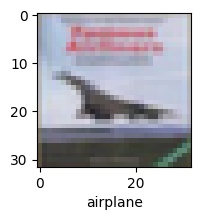

In [34]:
plot_sample(X_test, y_test,3)